I have Writen TWO codes 
1) CODE1 :This code behaves same as the original code does but it is helpfull to to visualize the OUTPUT   (You can use this code entirely if you want to analysis whole Video but it take a lot of time)
2) CODE2: This code is usefully when you dont want to see connected component or video output This code essential give the nested Dictonary as output 

E.g

Dict1={
    
1: {

    1:[ ],
    2:[ ],
    ....
    n:[ ]
},

2: { 

    1:[ ],
    2:[ ],
    ....
    K:[ ]


},
.....

q: { 
    
    1:[ ],
    2:[ ],
    ....
    K:[ ]


}}


Here the keys of Dict1 are the interval at which the connected component are caclulated and the keys of inside dictonary are the number of connected components in the interval for each frame

So Once code is run You get the time series of each componnet in the entire video which can later be use to find FFT  or plot graphs


In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

Video end here at  120.0seconds


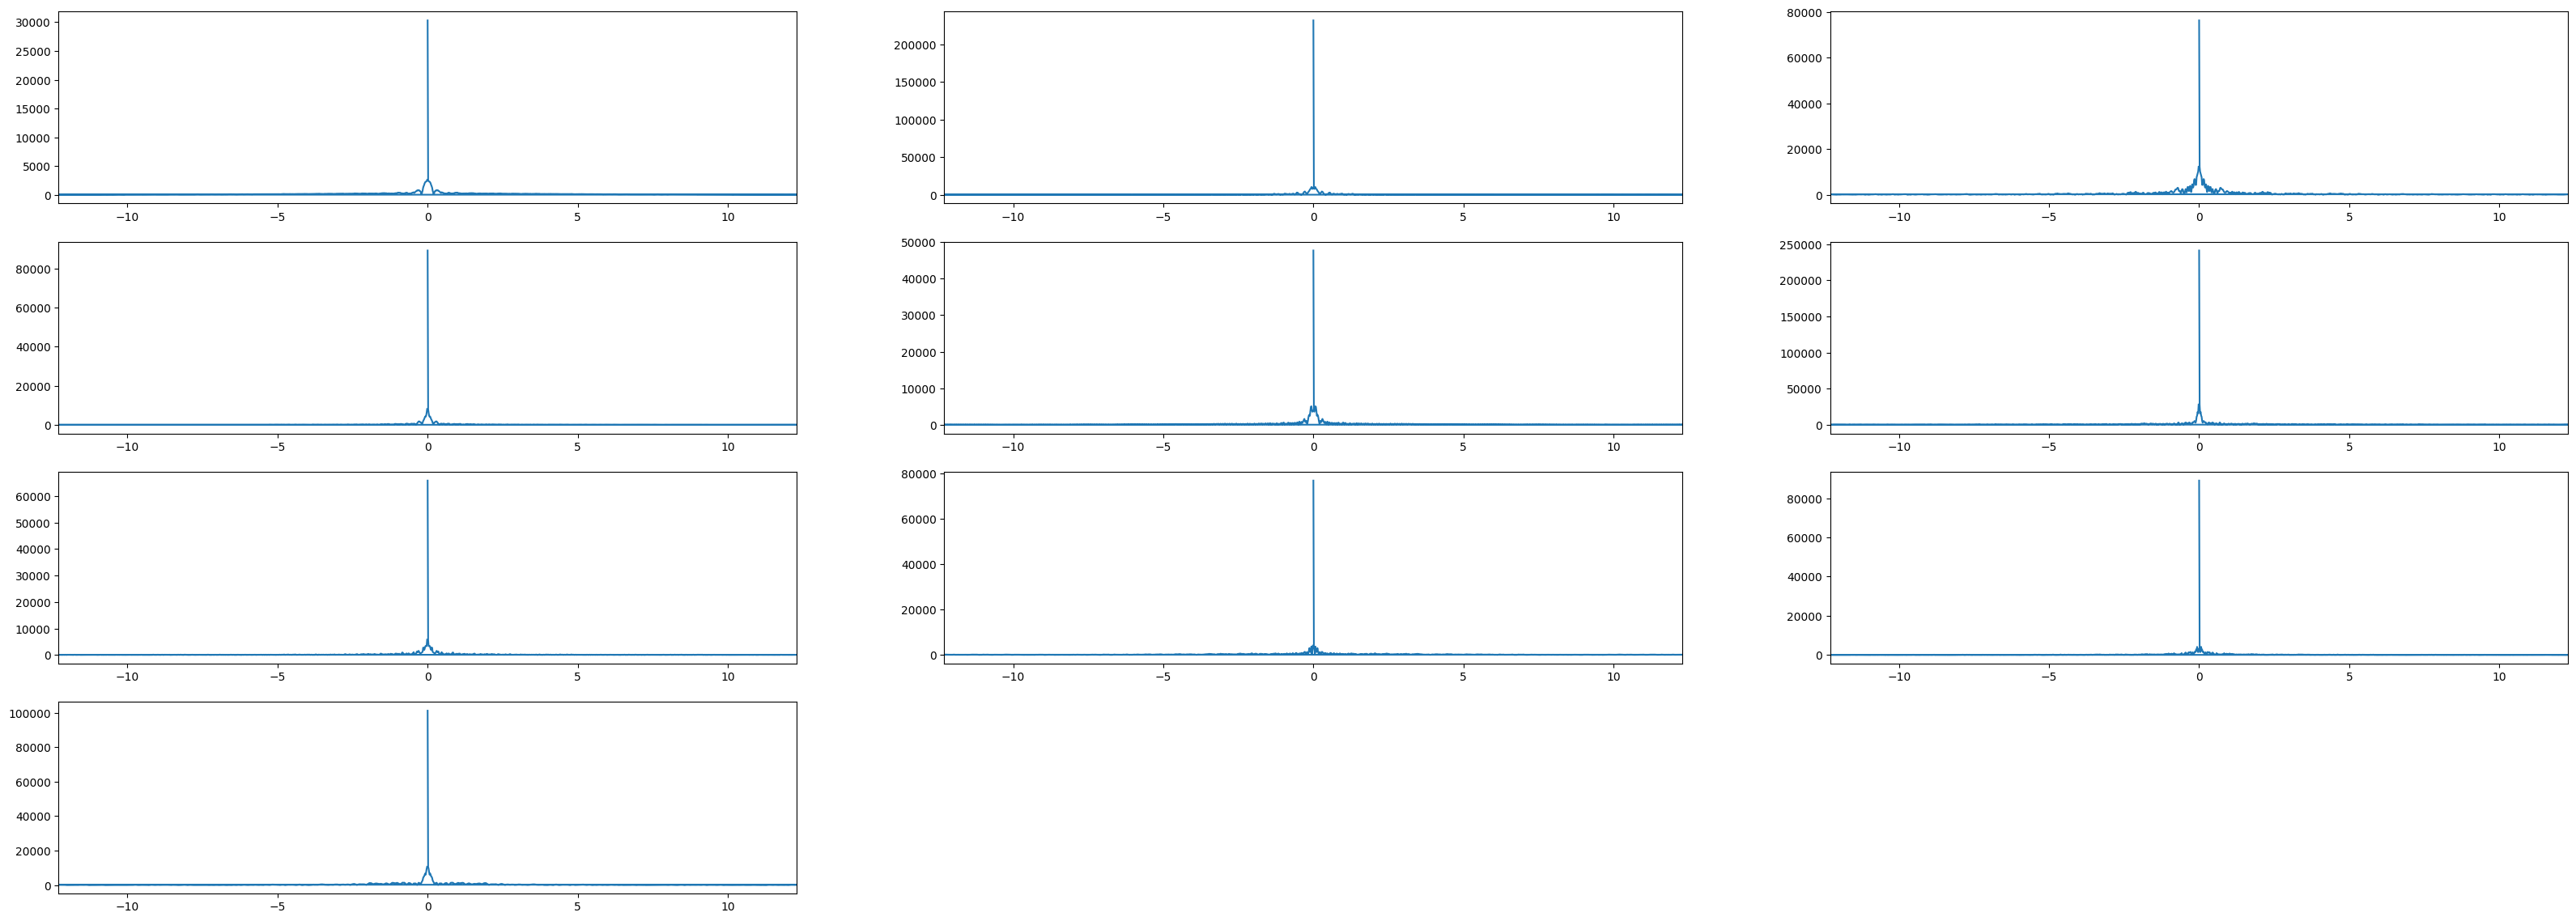

In [12]:
# CODE1



# Open the video file
cap = cv2.VideoCapture(os.getcwd()+'\\Mini_project.mp4')  #ADD this file location you need

# Check if the video capture object is successfully opened
if not cap.isOpened():
    print("Error: Couldn't open video file.")
    exit()

# Create a window to display the video
cv2.namedWindow('Video Player', cv2.WINDOW_NORMAL)
cv2.namedWindow('Binary image Player', cv2.WINDOW_NORMAL)


FpS1 = cap.get(cv2.CAP_PROP_FPS) #Finding the FPS of Video

# Variable
m=0

#Interval for calculating connected component in seconds
Interval=60

''' This is to initialize the Video from certain time frame 
Note : the value of timeframe is in millisecond (here 2000)
'''
# cap.set(cv2.CAP_PROP_POS_MSEC, 2000)

while True:

    # Read a frame from the video
    ret, frame = cap.read()
    if not ret:
        break

    #Getting timestamp of current frame
    timestamp_ms = cap.get(cv2.CAP_PROP_POS_MSEC)

    #Converting RGB Frame to Gray scale image
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    ''' #This is option part if you want to Analyse certain portion of entire video
    # Note Here when it breaks at Interal T then it wont give fft of Tth interval 

    Time=2
    if timestamp_ms>=1000*60*Time:
         print(f"Video end here at  {timestamp_ms/1000}seconds")
         break
    

    '''
    

    # Calculationg Connected Component after every Interval seconds
    if timestamp_ms>=Interval*1000*m:
        

        # Creating Dictonary to temporarily Store the Each component Pixel value
        Dict={}

        # COverting Grayscale Frame into Binary iamge for better clearity if Connected component
        Binary_frame = cv2.threshold(frame.copy(), 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

        # getting components using 8 connectivity
        retval, label, stats, centroid = cv2.connectedComponentsWithStats(Binary_frame, connectivity=8, ltype=cv2.CV_32S)    
        m +=  1

    # Averaging all the pixel value in a component and doing it for all components in a single frame and adding in a dictonary
    for component_label in range(1, retval):
        if Dict.get(component_label) is None:
            Dict[component_label] = []
        
        ''' Here I have chosen mean to combine pixels in one component'''
        Dict[component_label].append(np.mean(frame[label == component_label]))

    
    # This is to Create Subplots at the end of 1 interval as to reduce cluttering on graph also till the end sufficient points are collected
    if  (timestamp_ms)==(m*1000*Interval-40):
        plt.figure(figsize=(40,40))

        # Calculating FFT for each component in a frame and ploting its graphs
        for i in Dict.keys():
                fft1=np.fft.fft(Dict[i])
                freq=np.fft.fftfreq(len(Dict[i]),(1/FpS1))
                plt.subplot(retval,3, i)
                plt.plot(freq,np.abs(fft1),label=f'FFT{i}')
                plt.xlim(freq.min(), freq.max())

         
    # This is to mark the connected component in the frame 
    for J in range(1, retval):
        
        if len(frame[label==J])>100:      # DID IT TO AVOID SMALL COMPONENT
            x = stats[J, cv2.CC_STAT_LEFT]
            y = stats[J, cv2.CC_STAT_TOP]
            w = stats[J, cv2.CC_STAT_WIDTH]
            h = stats[J, cv2.CC_STAT_HEIGHT]
            area = stats[J, cv2.CC_STAT_AREA]
            (cX, cY) = centroid[J]
            output = frame.copy()
            cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 3)
            cv2.circle(output, (int(cX), int(cY)), 4, (0, 0, 255), -1)
            output = cv2.resize(output, (frame.shape[1], frame.shape[0]))
         
            cv2.imshow("Output", output)
            cv2.waitKey(1)

    # Displaying original Video in gray scale
    cv2.imshow('Video Player', frame)

    # Display the Binary image calcualted for every interval
    cv2.imshow('Binary image Player', Binary_frame)

    # Break the loop if the 'q' key is pressed
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break


# Release the video capture object and close all windows
cap.release()
cv2.destroyAllWindows()


In [15]:
# CODE2



# Open the video file
cap = cv2.VideoCapture(os.getcwd()+'\\Mini_project.mp4')  #ADD this file location you need

# Check if the video capture object is successfully opened
if not cap.isOpened():
    print("Error: Couldn't open video file.")
    exit()

'''
#Run this code when you want FFT and full nested Dictonary as output
    
# # Create a window to display the video
# cv2.namedWindow('Video Player', cv2.WINDOW_NORMAL)
# cv2.namedWindow('Binary image Player', cv2.WINDOW_NORMAL)

'''

FpS1 = cap.get(cv2.CAP_PROP_FPS) #Finding the FPS of Video
Dict2={}
# Variable
m=0

#Interval for calculating connected component in seconds
Interval=60

''' This is to initialize the Video from certain time frame 
Note : the value of timeframe is in millisecond (here 2000)
'''
# cap.set(cv2.CAP_PROP_POS_MSEC, 2000)

while True:

    # Read a frame from the video
    ret, frame = cap.read()
    if not ret:
        break

    #Getting timestamp of current frame
    timestamp_ms = cap.get(cv2.CAP_PROP_POS_MSEC)

    #Converting RGB Frame to Gray scale image
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    ''' #This is option part if you want to Analyse certain portion of entire video
    # Note Here when it breaks at Interal T then it wont give fft of Tth interval '''
    Time =2
    if timestamp_ms>=1000*60*Time:
         print(f"Video end here at  {timestamp_ms/1000}seconds")
         break
    
    
    

    # Calculationg Connected Component after every Interval seconds
    if timestamp_ms>=Interval*1000*m:
        

        # Creating Dictonary to temporarily Store the Each component Pixel value
        Dict2[m+1]={}

        # COverting Grayscale Frame into Binary iamge for better clearity if Connected component
        Binary_frame = cv2.threshold(frame.copy(), 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

        # getting components using 8 connectivity
        retval, label, stats, centroid = cv2.connectedComponentsWithStats(Binary_frame, connectivity=8, ltype=cv2.CV_32S)    
        m +=  1

    # Averaging all the pixel value in a component and doing it for all components in a single frame and adding in a dictonary
    for component_label in range(1, retval):
        if Dict2[m].get(component_label) is None:
            Dict2[m][component_label] = []
        
        ''' Here I have chosen mean to combine pixels in one component'''
        Dict2[m][component_label].append(np.mean(frame[label == component_label]))


#Run this code when you want FFT and full nested Dictonary as output


#     # This is to Create Subplots at the end of 1 interval as to reduce cluttering on graph also till the end sufficient points are collected
#     if  (timestamp_ms)==(m*1000*Interval-40):
#         plt.figure(figsize=(8,40))

#         # Calculating FFT for each component in a frame and ploting its graph
#         for h in Dict2.keys():
#             for i in Dict2[h].keys():
#                 fft1=np.fft.fft(Dict2[h][i])
#                 freq=np.fft.fftfreq(len(Dict2[h][i]),(1/FpS1))
#                 plt.subplot(retval, 3, i)
#                 plt.plot(freq,np.abs(fft1),label=f'FFT{i}')
#                 plt.xlim(freq.min(), freq.max())


#     # This is to mark the connected component in the frame 
#     for J in range(1, retval):
        
#         if len(frame[label==J])>100:      # DID IT TO AVOID SMALL COMPONENT
#             x = stats[J, cv2.CC_STAT_LEFT]
#             y = stats[J, cv2.CC_STAT_TOP]
#             w = stats[J, cv2.CC_STAT_WIDTH]
#             h = stats[J, cv2.CC_STAT_HEIGHT]
#             area = stats[J, cv2.CC_STAT_AREA]
#             (cX, cY) = centroid[J]
#             output = frame.copy()
#             cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 3)
#             cv2.circle(output, (int(cX), int(cY)), 4, (0, 0, 255), -1)
#             output = cv2.resize(output, (frame.shape[1], frame.shape[0]))
         
#             cv2.imshow("Output", output)
#             cv2.waitKey(1)

#     # Displaying original Video in gray scale
#     cv2.imshow('Video Player', frame)

#     # Display the Binary image calcualted for every interval
#     cv2.imshow('Binary image Player', Binary_frame)




    # Break the loop if the 'q' key is pressed
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

# Release the video capture object and close all windows
cap.release()
cv2.destroyAllWindows()


Video end here at  120.0seconds


For refferencce RUN BELOW CELL

In [14]:
# print(f'Total interval for which video evaluated')
# print(Dict2.keys())
# print("")
# print(f'Total number of connected components in 1st interval')
# print(Dict2[1].keys())
# print("")
# print(f'Total number of connected components in 2nd interval')
# print(Dict2[2].keys())


Total interval for which video evaluated
dict_keys([1, 2])

Total number of connected components in 1st interval
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

Total number of connected components in 2nd interval
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
